<a href="https://colab.research.google.com/github/roshanappa/Covolutional-Neural-Network/blob/master/Waste%20Classification/Waste_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library


# Segregated into two classes (Organic and recyclable)


- Studied white papers on waste management
- Analysed the components of household waste
- Segregated into two classes (Organic and recyclable)
- Automated the process by using IOT and machine learning
- Reduce toxic waste ending in landfills

## Import The Libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img
from keras.models import Model,load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Collect The Data.

In [8]:
!pip install -q kaggle

In [9]:
!mkdir -p ~/.kaggle

In [10]:
!cp kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d techsash/waste-classification-data

 99% 423M/427M [00:03<00:00, 122MB/s]
100% 427M/427M [00:03<00:00, 127MB/s]


## Data Unzip

In [13]:
import zipfile

In [15]:
from zipfile import ZipFile

In [16]:
dir = '/content/waste-classification-data.zip'

In [17]:
with ZipFile(dir,'r') as zip:
  zip.extractall()
  print('Done')

Done


### Data understanding


In [18]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen  = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

### Data Gathering 

In [20]:
train_directory = '/content/DATASET/TRAIN'
test_directory = '/content/DATASET/TEST'

In [21]:
batch_size=20
target_size=(64,64)
class_mode='binary'
classes=['O','R']

In [22]:
train_data = train_datagen.flow_from_directory(directory=train_directory,target_size=target_size,class_mode=class_mode,batch_size=batch_size)

test_data = test_datagen.flow_from_directory(directory=test_directory,target_size=target_size,class_mode=class_mode,batch_size=batch_size)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## Develope The Model.

In [36]:
model = Sequential()
model.add(Conv2D(500,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(200,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,kernel_size=(3,3),strides=(1,1),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(128,activation='relu',))
model.add(Dropout(0.20))
model.add(Dense(1,activation='sigmoid'))

Save the model when the lowest loss is achieved during epochs training iterations.

In [39]:
checkpoint = ModelCheckpoint(filepath = 'cnn.hdf5', verbose = 1, save_best_only = True)

Also stop the training the model if the loss is not decreasing with epochs training iterations

In [40]:
earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 15, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

Reduce the learning rate if improvemnt is not seen for 'patience' number of epochs.This helps to have a smooth learning curve.

In [41]:
ReduceLR = ReduceLROnPlateau(patience=3, verbose=1)

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
callbacks = [earlystop, checkpoint, ReduceLR]

In [51]:
history = model.fit_generator(train_data, epochs = 7,steps_per_epoch=len(train_data), verbose=1,callbacks = callbacks,validation_data=test_data,validation_steps=1000)

Epoch 1/7
1129/1129 [==============================] - ETA: 0s - loss: 0.4628 - accuracy: 0.7982WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1000 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: val_loss improved from inf to 0.42041, saving model to cnn.hdf5
1129/1129 [==============================] - 2865s 3s/step - loss: 0.4628 - accuracy: 0.7982 - val_loss: 0.4204 - val_accuracy: 0.8229
Epoch 2/7
1129/1129 [==============================] - 2759s 2s/step - loss: 0.4199 - accuracy: 0.8178
Epoch 3/7
1129/1129 [==============================] - 2752s 2s/step - loss: 0.3940 - accuracy: 0.8306
Epoch 4/7
1129/1129 [==============================] - 2751s 2s/step - loss: 0.3741 - accuracy: 0.8395
Epoch 5/7
1129/1129 [==============================] - 2752s 2s/step - loss: 0.3625 - accuracy: 0.8461
Epoch 6/7
1

In [52]:
model.save('model.h5')

In [53]:
history.history

{'accuracy': [0.7981740832328796,
  0.817807137966156,
  0.8306151628494263,
  0.8395231366157532,
  0.8461265563964844,
  0.8533061742782593,
  0.8540152311325073],
 'loss': [0.46280786395072937,
  0.4198820888996124,
  0.3939809203147888,
  0.37409597635269165,
  0.3625364601612091,
  0.35106420516967773,
  0.34682443737983704],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001],
 'val_accuracy': [0.8229207992553711],
 'val_loss': [0.42040666937828064]}

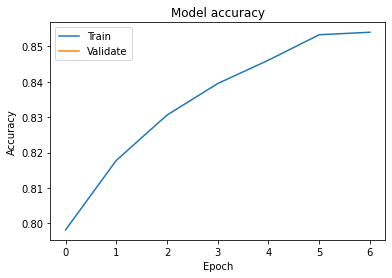

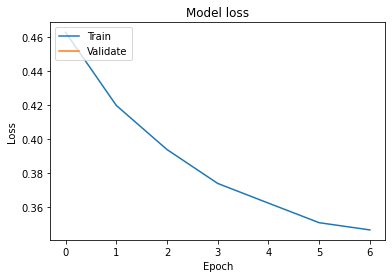

In [57]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

## Cross Varify the Model.

In [61]:
scores = model.evaluate_generator(test_data,2513) #1514 testing images
print('Test Loss :',scores[0])
print('Test Accuracy :',scores[1])

Test Loss : 0.2895572781562805
Test Accuracy : 0.8953441977500916


In [63]:
predict_generator_score=model.predict_generator(test_data)
#predict_generator takes your test data and gives you the output.

In [65]:
predict_generator_score[:10]

array([[0.04623374],
       [0.04507282],
       [0.9151453 ],
       [0.9120903 ],
       [0.31406116],
       [0.69575965],
       [0.00793597],
       [0.5159766 ],
       [0.13543427],
       [0.05812082]], dtype=float32)

In [66]:
from tensorflow.keras.preprocessing import image
input = image.load_img('/content/organic.jpg',target_size=(64,64))
input = img_to_array(input)
input = input
input = np.expand_dims(input,axis=0)

In [68]:
result = model.predict(input)
result

array([[0.]], dtype=float32)

In [67]:
train_data.class_indices

{'O': 0, 'R': 1}

In [69]:
if result[0][0]==0:
  prediction = 'Orgaic'
  print(prediction)
else:
  prediction = 'Recyclable'
  print(prediction)

Orgaic


In [72]:
def prediction_class(input_image,targe_size):
  from tensorflow.keras.preprocessing import image
  input = image.load_img(input_image,target_size=target_size)
  input = img_to_array(input)
  input = input/255
  input = np.expand_dims(input,axis=0)
  result = model.predict(input)
  if result[0][0]==0:
    prediction = 'Orgaic'
    print(prediction)
  else:
    prediction = 'Recyclable'
    print(prediction)

In [73]:
prediction_class('/content/Recyclable.jpg',(64,64))

Recyclable


Thank You !!

Lesser accuracy obtain due to less epoches,If we want it better accuarcy we need change the into the some parameter